In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist, pos_tag
from nltk.corpus import wordnet
import string
import pickle
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer, CountVectorizer
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import sys
import ast
from wordcloud import WordCloud
import nltk
from sklearn.naive_bayes import GaussianNB

In [2]:

df = pd.read_csv('Datasets/Reviews.csv')
#reading pandas dataframe

In [3]:
df.head()
#this returns the first N amount of rows, the default being 5
#helpful to just look at the data and will use this throughout cleaning just a headsup

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape
#dimensions of the dataframe 
#so there are 568454 rows and 10 columns so far

(568454, 10)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [7]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [8]:
df.dropna(inplace=True)

#this is to remove any Null values 'NAN' if any idk

In [9]:

df['Text'] = df['Text'].str.lower().str.replace('\s+', ' ', regex=True).str.strip()

#this converts all the text in the 'Text' column to lowercase and 
#ensures that there is only one whitespace between words
#im not sure why its giving that syntax warning might ask paresh

In [10]:
def characters(text):
    return re.sub(r'\W+', ' ', text)
df['Text'] = df['Text'].apply(characters)

df.Text.head(10)

#this removes all the non-word characters such as punctuation  and characters from the text 


0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
5    i got a wild hair for taffy and ordered this f...
6    this saltwater taffy had great flavors and was...
7    this taffy is so good it is very soft and chew...
8    right now i m mostly just sprouting this so my...
9    this is a very healthy dog food good for their...
Name: Text, dtype: object

In [11]:
#this is removing selected stop words of our choice from our data. we can add more 
nltk.download('stopwords')
stop = stopwords.words('english')
stop_words = set (stopwords.words('english'))
new_stopwords = {"review","one","product", "would", "shall", "make", "new", "should", "maybe", "Amazon", "coffee", "chocolate","china","cup"}
stop.extend(new_stopwords)
stop = set(stop)
df.Text.head()

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

In [12]:
#def correcting_spelling(text):
 #   bob = TextBlob(text)
  #  corrected_data = str(bob.correct())
   # return corrected_data

#df['corrected_data'] = df['Text'].apply(correcting_spelling)
#df.Text.head(5)
#this is to correct any spelling mistakes in the data
#takes a century to process don't worry 

In [13]:
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()
#lemmatization 
#this is where we reduce the word to it's root word 
#e.g running -> run

0    i have bought several of the vitality canned d...
1    product arrived labeled a jumbo salted peanut ...
2    this is a confection that ha been around a few...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there wa a wide a...
Name: Text, dtype: object

In [14]:
df.Score.value_counts()
#

Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64

In [15]:
reviews = df

In [16]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]

In [17]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
#combines score 1 to score 5 into a single dataframe called reviews sample
#great for data analysis or from what google tells me

In [18]:

#  split the data into negative and positive 
#score 3 is neutral so we remove it
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]

# transforming it into a single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

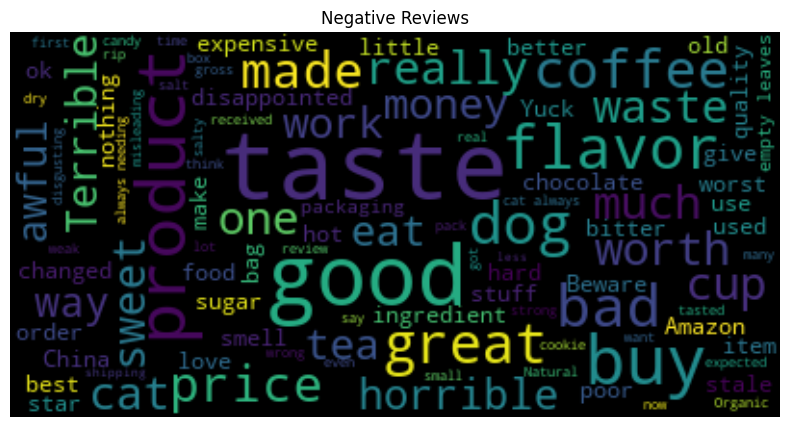

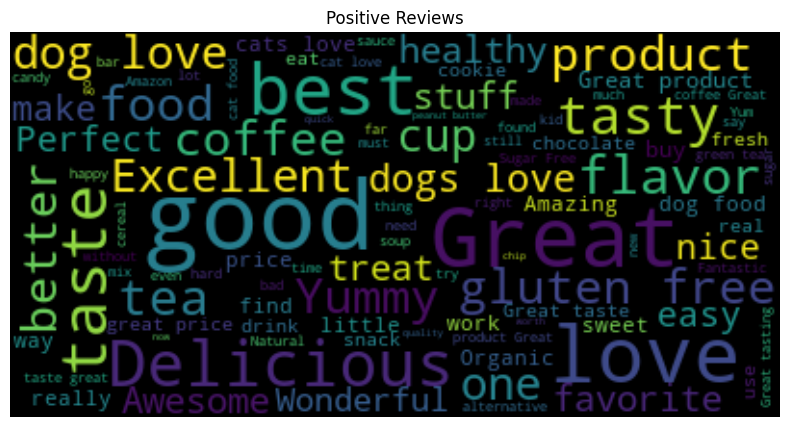

In [19]:
#visualistaion of negative and positive reviews
wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(negative_reviews_str)
wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(positive_reviews_str)

#this is for negative reviews
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis("off")

#this is for positive reviews
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis("off")

plt.show()

In [20]:
X = df['Text']
Y = df['Score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [24]:
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data to create feature vectors
X_train_vectors = vectorizer.fit_transform(X_train)

# Transform the test data to feature vectors
X_test_vectors = vectorizer.transform(X_test)

In [25]:
#X_test_vectors = vectorizer.transform(X_test)
nb_classifier = MultinomialNB()

In [26]:
nb_classifier.fit(X_train_vectors, Y_train)

MultinomialNB()

In [27]:
Y_pred = nb_classifier.predict(X_test_vectors)

In [28]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 69.91%


# Add sentiment analysis as an extra label

In [ ]:
#dataset = df
#sentiment_model = pickle.load(open('TrainedModels/SentimentAnalysisModel_V1.pkl', 'rb'))
#sentiment_vectorizer = pickle.load(open('TrainedModels/sentimentVectorizer_V1.pkl', 'rb'))

#sa_processed_data= dataset['text'].str.lower().str.replace('\s+', ' ', regex=True).str.strip()

#this converts all the text in the 'Text' column to lowercase and 
#ensures that there is only one whitespace between words
#im not sure why its giving that syntax warning might ask paresh

#def characters(text):
#    return re.sub(r'\W+', ' ', text)
#sa_processed_data = sa_processed_data.apply(characters)

#this removes all the non-word characters such as punctuation  and characters from the text 

#this is removing selected stop words of our choice from our data. we can add more 
#nltk.download('stopwords')
#stop = stopwords.words('english')
#stop_words = set (stopwords.words('english'))
#new_stopwords = {"review","one","product", "would", "shall", "make", "new", "should", "maybe", "Amazon", "coffee", "chocolate","china","cup"}
#stop.extend(new_stopwords)
#stop = set(stop)

#sa_processed_data = sa_processed_data.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#lemmatization 
#this is where we reduce the word to it's root word 
#e.g running -> run


#sentiment_model_data = sentiment_vectorizer.transform(sa_processed_data)

#predicted_sentiment = sentiment_model.predict(sentiment_model_data)

#dataset['sentiment'] = predicted_sentiment

#df = pd.DataFrame(dataset)

# Specify the file path where you want to save the CSV file
#csv_file_path = 'Datasets/fake_or_real_news_with_sentiment.csv'

# Save the DataFrame to a CSV file
#df.to_csv(csv_file_path, index=False)

In [30]:
#print(classification_report(Y_test, Y_pred))

# V1 - 21/03/2024
#with open('SentimentAnalysisModel_V1.pkl', 'wb') as f:
#    pickle.dump(nb_classifier,f)

# V1 - 21/03/2024
#with open('sentimentVectorizer_V1.pkl', 'wb') as f:
#    pickle.dump(vectorizer, f)